# NYU preprocessing

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.io
import os
import h5py

In [2]:
# All the data comes in a mat file

nyu_path = "/Users/ismas/Downloads/NYU/"
# Load data from the .mat file
mat_file = h5py.File(nyu_path + "nyu_depth_v2_labeled.mat", 'r')

# Print the keys at the root level of the file
print("Root keys:", list(mat_file.keys()))

Root keys: ['#refs#', '#subsystem#', 'accelData', 'depths', 'images', 'instances', 'labels', 'names', 'namesToIds', 'rawDepthFilenames', 'rawDepths', 'rawRgbFilenames', 'sceneTypes', 'scenes']


# Images & depths

In [3]:
# Importing images and depths
images = np.asarray(mat_file['images'])
images = np.einsum('ijkl->ilkj', images) # sorting dimensions

depths = np.asarray(mat_file['depths'])
depths = np.einsum('ijk->ikj', depths) # sorting dimensions

images.shape, depths.shape

((1449, 480, 640, 3), (1449, 480, 640))

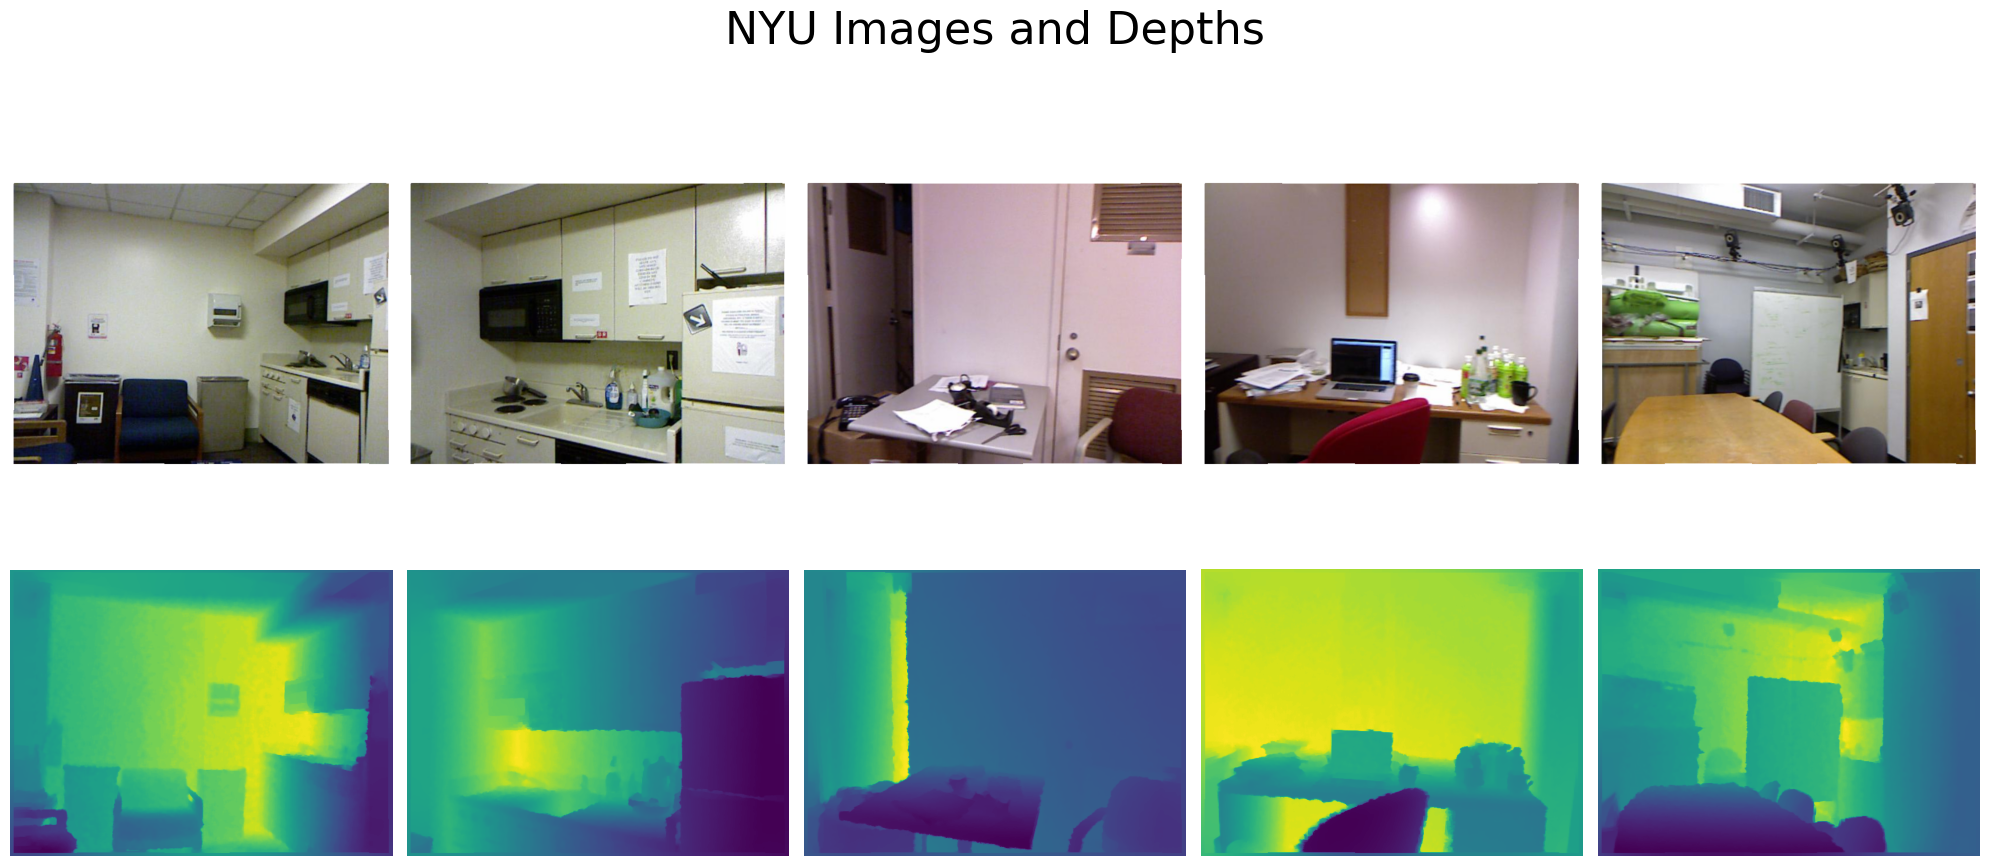

In [4]:
n_cols = 5
# Set up the subplot grid
fig, axs = plt.subplots(2, n_cols, figsize=(20, 10))

# Loop through each set of images
for i in range(n_cols):
    # Display the images in the current row
    axs[0, i].imshow(images[i])
    axs[0, i].axis('off')  # Turn off axis labels for better visualization
    axs[1, i].imshow(depths[i])
    axs[1, i].axis('off')  # Turn off axis labels for better visualization

# Adding a title to the figure
plt.suptitle("NYU Images and Depths", fontsize=32)

# Adjust layout to prevent clippLing of subplots
plt.tight_layout()

# Show the plot
plt.show()

An important issue was the magnitude of the depth maps. Every image had different range of values

In [5]:
means = np.zeros(depths.shape[0])

for i, depth in enumerate(depths):
    means[i] = np.mean(depth)

np.mean(means), np.std(means), np.mean(depths), np.std(depths)

(2.7963148435285947, 0.8195100165656674, 2.7963083, 1.3860533)

In [6]:
min(means), max(means)

(1.0034171342849731, 6.737364768981934)

0.7132995 9.99547 0 255


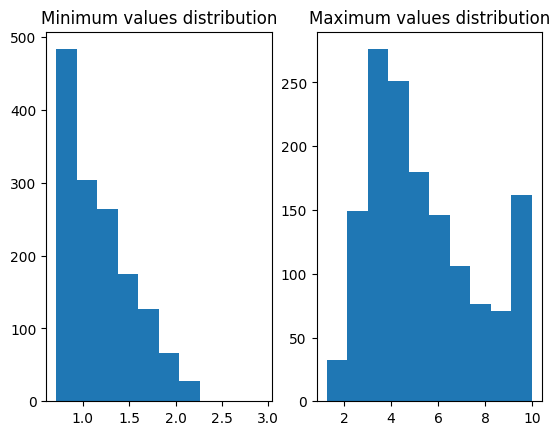

In [7]:
mins = np.asarray([np.min(depths[i]) for i in range(depths.shape[0])])
maxs = np.asarray([np.max(depths[i]) for i in range(depths.shape[0])])

print(np.min(mins), np.max(maxs), np.min(images), np.max(images))

plt.subplot(1,2,1)
plt.hist(mins)
plt.title("Minimum values distribution")
plt.subplot(1,2,2)
plt.hist(maxs)
plt.title("Maximum values distribution")
plt.show()

# Resize and save

According to the DIW dataset, all the images are resized to the resolution 200x200

In [109]:
width, height = 200, 200
save_path_img = "/Users/ismas/Downloads/NYU/img_" + str(width) + "_" + str(height)
save_path_depth = "/Users/ismas/Downloads/NYU/depth_" + str(width) + "_" + str(height)

resized_imgs = np.zeros((images.shape[0], width, height, 3))
resized_depths = np.zeros((images.shape[0], width, height))

# The images are resized one by one but then are stored in the same array
for i, (image, depth) in enumerate(zip(images, depths)):
    resized_img = cv2.resize(image, (width, height))/255 # The images are normalized
    resized_depth = cv2.resize(depth, (width, height)) # The depths will be normalized when extracting the dataset in the other notebooks
    
    resized_imgs[i] = resized_img
    resized_depths[i] = resized_depth

np.save(save_path_img + ".npy", resized_imgs)
np.save(save_path_depth + ".npy", resized_depths)

print("Resizing and saving complete")

Resizing and saving complete
